## Sara 2. Intento 1

## Ecuación diferencial con solución exacta.

Queremos estudiar $$ y' = f(t, y) \quad \textrm{con} \quad y(0)=y_0 $$

La ecuación (lineal) que propongo es
\begin{equation}
    y' = 1 - t + 4y \quad \textrm{con} \quad y(0) = 1
\end{equation}
La solución que satisface esta condición inicial es
\begin{equation}
    y(t) = \frac{19}{16} e^{4t} + \frac{t}{4} - \frac{3}{16}
\end{equation}

### Gráfica de mi solución exacta.

In [1]:
using PyPlot

In [2]:
xs = 0:1/2^6:1
ys = [(19/16)*exp(4t) + (t/4) - (3/16) for t in xs]

65-element Array{Float64,1}:
  1.0
  1.0804934199649583
  1.1659262880168562
  1.2566171711874146
  1.3529051823166929
  1.4551513051438831
  1.563739804859114
  1.679079729628033
  1.8016065089564022
  1.9317836551403547
  2.070104574450764
  2.2170944951289715
  2.373312519727551
  ⋮
 32.620769048358866
 34.72727449021649
 36.9693859292741
 39.35584920094712
 41.89597419857389
 44.599671252026184
 47.47748985253855
 50.54065987507455
 53.80113545930728
 57.271641720679845
 60.96572447407053
 64.89780316435878

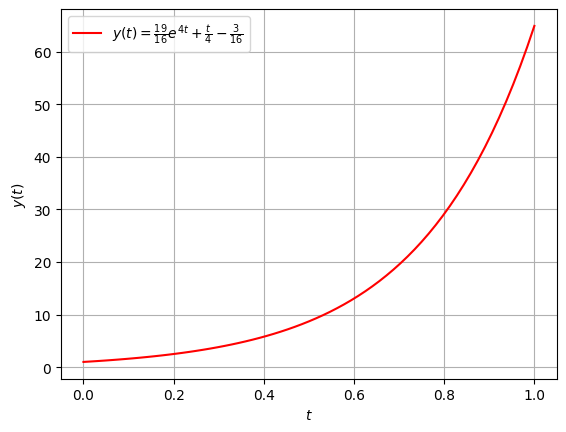

In [3]:
plot(xs, ys, "r", label = L"y(t) = \frac{19}{16} e^{4t} + \frac{t}{4} - \frac{3}{16}")
xlabel(L"t")
ylabel(L"y(t)")
grid("on")
legend();

## Método del Trapezoide (implentación).

Sabemos que la fórmula para encontrar la solución aproximada de nuestra ODE se escribe $$y_{n+1} = y_n + \frac{1}{2}h[f(t_n, y_n) + f(t_{n+1}, y_{n+1})]$$

Notar que necesitamos despejar $y_{n+1}$ en cada paso de tiempo, **en nuestra ecuación particular que elegimos podemos despejar a mano**. Esto es porque tramposamente elegí una ecuación lineal. Si no fuera el caso tengo que implementar en cada paso de tiempo un programa para encontrar $y_{n+1}$, usando por ejemplo Método de Newton.

Sustituyendo $f(t, y) = 1 - t + 4y$ en la fórmula anterior ,es decir haciendo $f(t_n, y_n) = 1 - t_n + 4y_n$ y también $f(t_{n+1}, y_{n+1}) = 1 - t_{n+1} + 4y_{n+1}$,  nos queda

$$y_{n+1}(1-2h) = y_n + \frac{1}{2}h[2 + 4y_n - t_n - t_{n+1}]$$

Finalmente pasando el $1-2h$ del otro lado obtenemos la fórmula para calcular la solución aproximada por el método de Trapezoide **para esta ecuación diferencial** $$y_{n+1} = \frac{y_n}{1-2h} + \frac{1}{2}\frac{h}{1-2h}[2 + 4y_n - t_n - t_{n+1}]$$

Que si definimos los parámetros $H_1 = \frac{1}{1-2h}$ y $H_2 = \frac{1}{2} \frac{h}{1-2h}$ queda expresada

$$y_{n+1} = H_1y_n + H_2[2 + 4y_n - t_n - t_{n+1}]$$

Finalmente la implementamos, para calcular la solución en el intervalo $[0,1]$

In [4]:
f(t,y) = 1 - t + 4y

f (generic function with 1 method)

In [5]:
function Trapezoide(f, t0, y0, N)
    ts = Float64[]
    ys = Float64[]
    
    h = 1/N
    H1 = 1/(1-2h)
    H2 = h/(2-4h)
    
    t_actual = t0
    y_actual = y0
    push!(ts, t_actual)
    push!(ys, y_actual)
    
    
    for j in 1:N
        t_nueva = t_actual + h
        y_nueva = H1*y_actual + H2*(2 + 4*y_actual - t_actual - t_nueva)
        
        push!(ts, t_nueva)
        push!(ys, y_nueva)
        
        t_actual = t_nueva
        y_actual = y_nueva        
    end
    return ts, ys
end

Trapezoide (generic function with 1 method)

In [6]:
Datos = Trapezoide(f, 0, 1, 32)

([0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625, 0.1875, 0.21875, 0.25, 0.28125  …  0.71875, 0.75, 0.78125, 0.8125, 0.84375, 0.875, 0.90625, 0.9375, 0.96875, 1.0], [1.0, 1.1661458333333332, 1.3534027777777777, 1.5645856481481482, 1.8028845679012346, 2.071915010288066, 2.375774511659808, 2.7191069465477824, 3.1071753727541536, 3.545944589121374  …  21.12025869881713, 23.945147358659412, 27.145646173147334, 30.771836496233647, 34.880477195731466, 39.53589498849566, 44.81099348696175, 50.78839678522331, 57.56174552325309, 65.23716575968683])

In [7]:
Datos_en_X = Datos[1]

33-element Array{Float64,1}:
 0.0
 0.03125
 0.0625
 0.09375
 0.125
 0.15625
 0.1875
 0.21875
 0.25
 0.28125
 0.3125
 0.34375
 0.375
 ⋮
 0.65625
 0.6875
 0.71875
 0.75
 0.78125
 0.8125
 0.84375
 0.875
 0.90625
 0.9375
 0.96875
 1.0

In [8]:
Datos_en_Y = Datos[2];

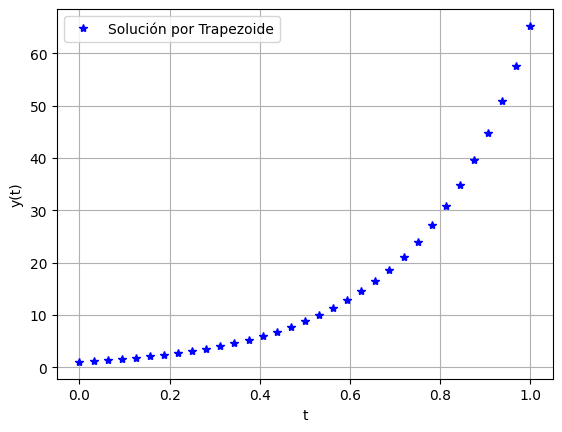

In [13]:
plot(Datos_en_X, Datos_en_Y, "b*", label="Solución por Trapezoide")
xlabel("t")
ylabel("y(t)")
grid("on")
legend();

## Comparación gráfica entre los dos métodos

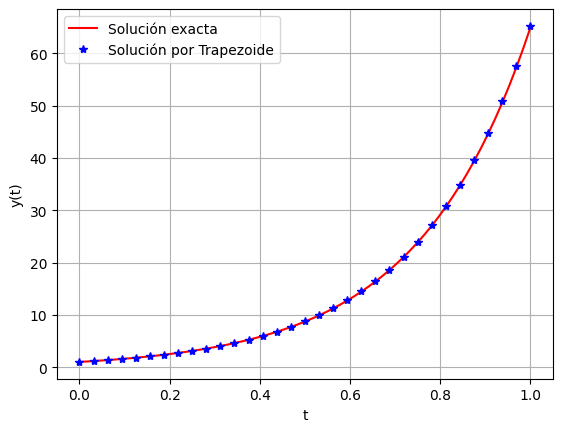

In [14]:
plot(xs, ys, "r", label = "Solución exacta")
plot(Datos_en_X, Datos_en_Y, "b*", label="Solución por Trapezoide")
xlabel("t")
ylabel("y(t)")
grid("on")
legend();

In [1]:
5*5

25